In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.isnull().sum().sum()

33523

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(5659, 10)

In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [ ]:
df["Year"].head()

,Year
1,(2019)
3,(2019)
5,(1997)
6,(2005)
8,(2012)


In [ ]:
genre = df['Genre']

In [ ]:
genre.head(11)

,Genre
1,Drama
3,"Comedy, Romance"
5,"Comedy, Drama, Musical"
6,"Drama, Romance, War"
8,"Horror, Mystery, Thriller"
9,"Action, Crime, Thriller"
10,Drama
11,Horror
12,"Horror, Romance, Thriller"
13,"Comedy, Drama, Romance"


In [ ]:
genres = df['Genre'].str.split(', ', expand=True)

In [ ]:
genres.head(11)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [ ]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [ ]:
genresPie = df['Genre'].value_counts()

In [ ]:
genresPie.head(11)

,count
Genre,
Drama,844
"Drama, Romance",332
"Action, Crime, Drama",329
"Action, Drama",206
"Comedy, Drama",205
"Comedy, Drama, Romance",188
Comedy,187
Action,170
"Drama, Family",160


In [ ]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [ ]:
genrePie.head(11)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [ ]:
df['Votes'].head(11)

,Votes
1,8
3,35
5,827
6,1086
8,326
9,11
10,17
11,59
12,983
13,512


In [ ]:
df["Director"].nunique()

2431

In [ ]:
directors = df["Director"].value_counts()

In [ ]:
directors.head(11)

,count
Director,
David Dhawan,41
Mahesh Bhatt,39
Ram Gopal Varma,33
Hrishikesh Mukherjee,33
Shakti Samanta,33
Vikram Bhatt,30
Priyadarshan,29
Basu Chatterjee,23
Rama Rao Tatineni,23


In [ ]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()

In [ ]:
actors.head(11)

,count
Mithun Chakraborty,160
Amitabh Bachchan,148
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
Shashi Kapoor,117
Jeetendra,116
Sanjay Dutt,101
Rekha,92
Ajay Devgn,92


In [ ]:
sb.set(style = "darkgrid")

In [ ]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

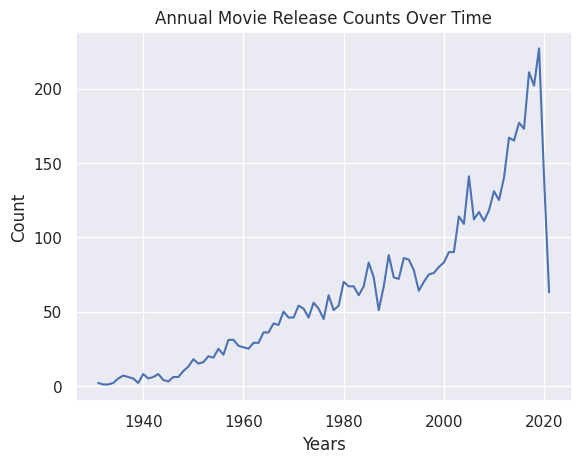

In [ ]:
ax = sb.lineplot(data=df['Year'].value_counts().sort_index())
darkgrid_positions = range(int(min(df['Year'])), int(max(df['Year'])) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

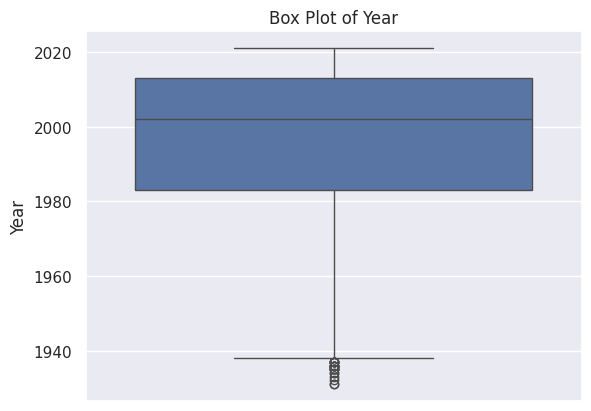

In [ ]:
ax = sb.boxplot(data=df, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

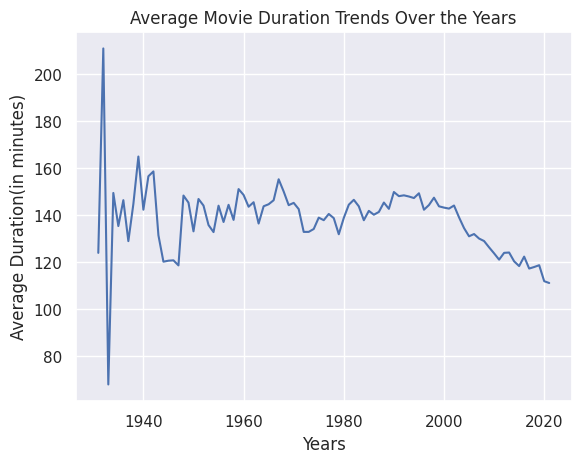

In [ ]:
ax = sb.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
darkgrid_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

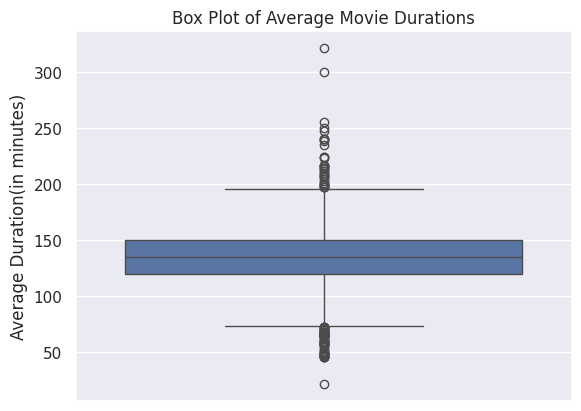

In [ ]:
ax = sb.boxplot(data=df, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [ ]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mf = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
mf.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


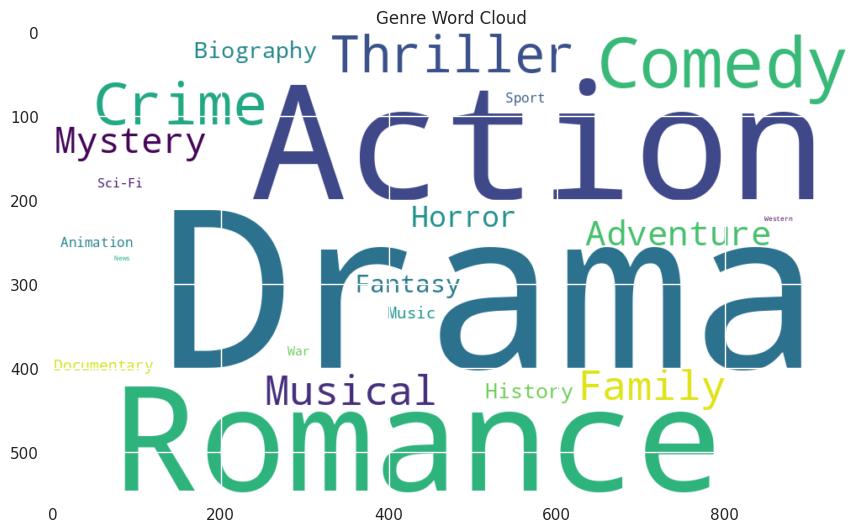

In [ ]:
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Genre Word Cloud')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Documentary'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'News'),
  Text(16, 0, 'Romance'),
  Text(17, 0, 'Sci-Fi'),
  Text(18, 0, 'Sport'),
  Text(19, 0, 'Thriller'),
  Text(20, 0, 'War'),
  Text(21, 0, 'Western')])

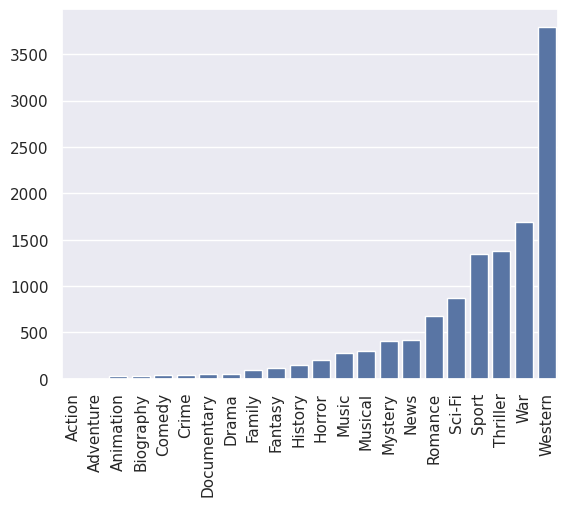

In [ ]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
plt.xticks(rotation=90)

In [ ]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

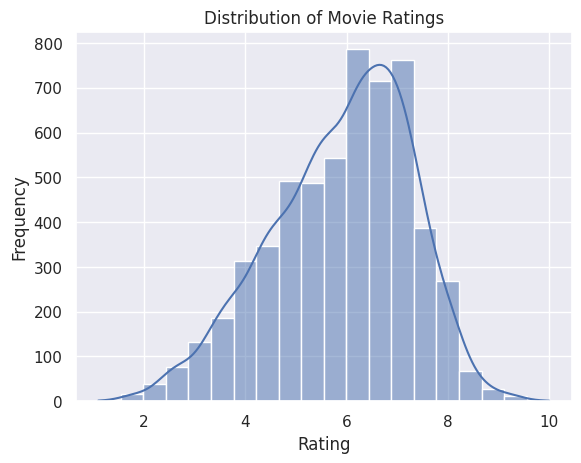

In [ ]:
ax = sb.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

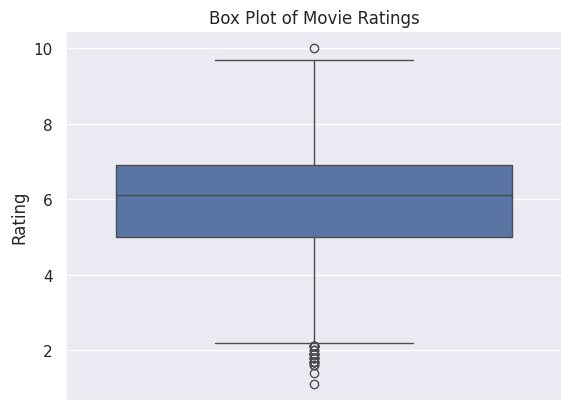

In [ ]:
ax = sb.boxplot(data=df, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
plt.show()

In [ ]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


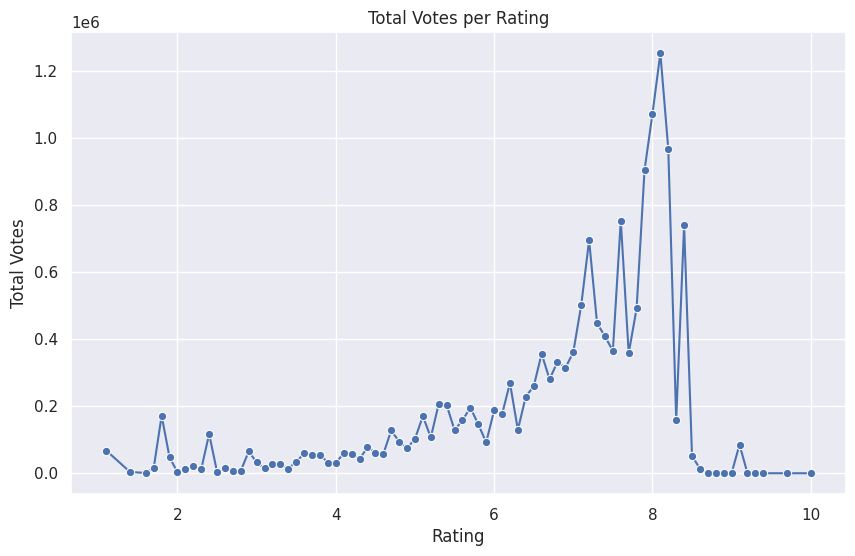

In [ ]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

<ipython-input-55-c536e5455881>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-55-c536e5455881>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



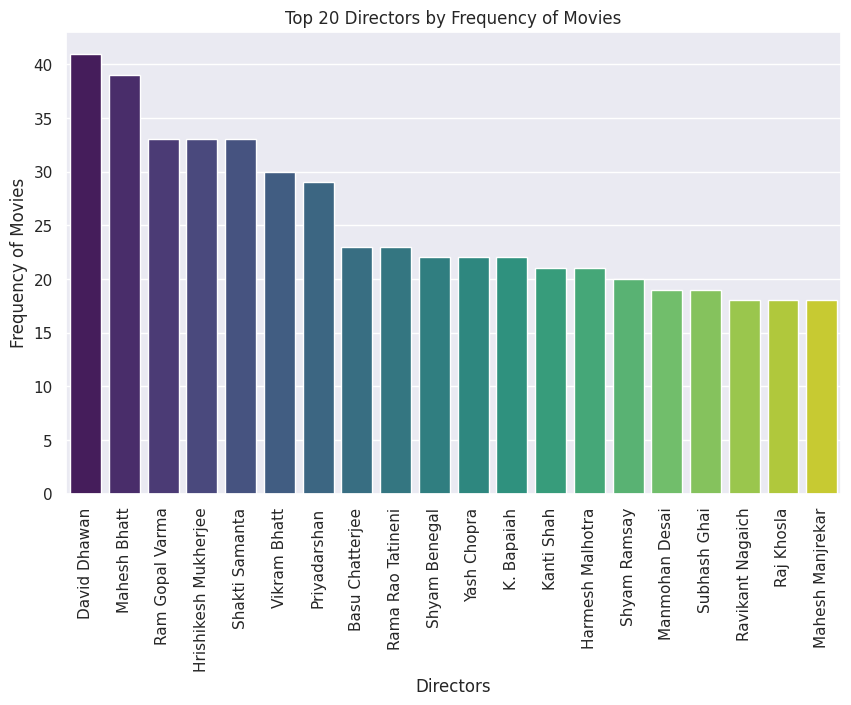

In [ ]:
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-56-0497b83eaaf4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-0497b83eaaf4>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



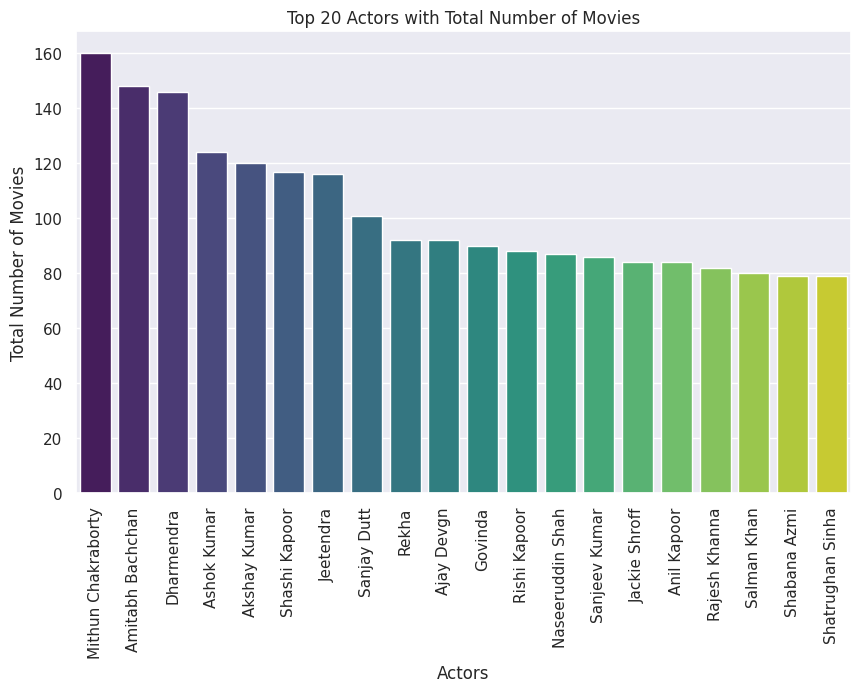

In [ ]:
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes

In [ ]:
df.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1982


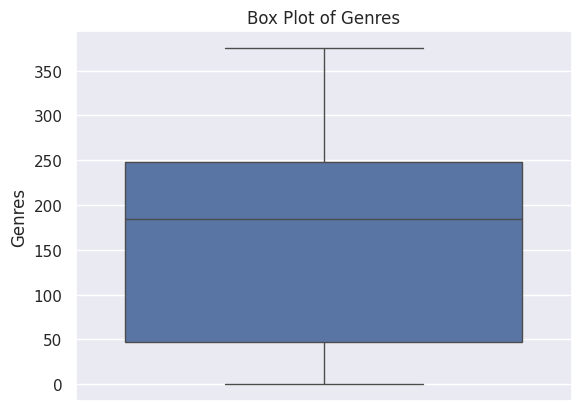

In [ ]:
ax = sb.boxplot(data=df, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
plt.show()

In [ ]:
Q1 = df['Genres'].quantile(0.25)
Q3 = df['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Genres'] >= lower_bound) & (df['Genres'] <= upper_bound)]

In [ ]:
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1982


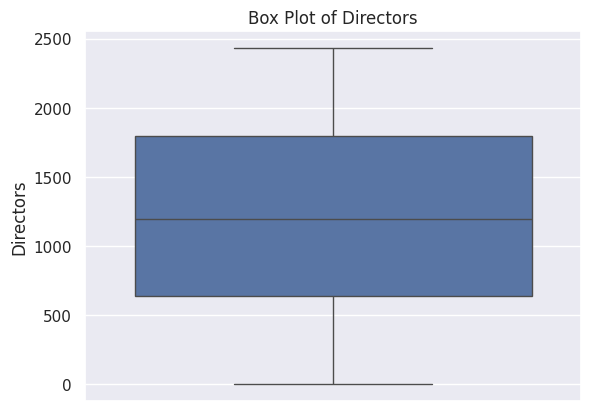

In [ ]:
ax = sb.boxplot(data=df, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
plt.show()

In [ ]:
Q1 = df['Directors'].quantile(0.25)
Q3 = df['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = df[(df['Directors'] >= lower_bound) & (df['Directors'] <= upper_bound)]

In [ ]:
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1982


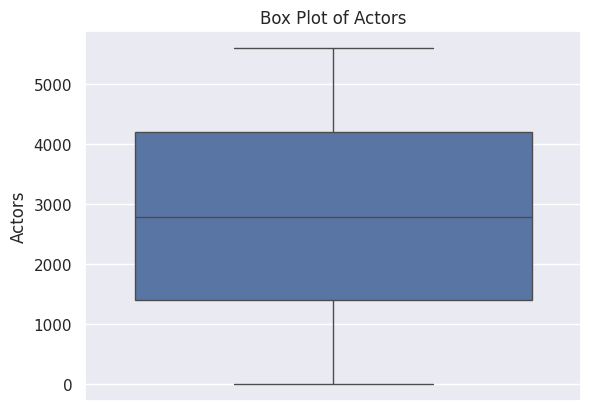

In [ ]:
ax = sb.boxplot(data=df, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
plt.show()

In [ ]:
Q1 = df['Actors'].quantile(0.25)
Q3 = df['Actors'].quantile(0.75)
Q1 = df['Actors'].quantile(0.25)
Q3 = df['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Actors'] >= lower_bound) & (df['Actors'] <= upper_bound)]

In [ ]:
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1982


In [ ]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = df['Rating']

In [ ]:
Input.head(16)

,Year,Duration,Votes,Directors,Genres,Actors
1,2019,109,8,629,229,3875
3,2019,110,35,1335,184,3343
5,1997,147,827,1530,157,1119
6,2005,142,1086,2044,289,2086
8,2012,82,326,135,320,5562
9,2014,116,11,401,37,974
10,2004,96,17,1083,229,3880
11,2016,120,59,266,316,3230
12,1991,161,983,1374,323,1900
13,2012,166,512,1506,159,1982


In [ ]:
Output.head(16)

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
9,4.0
10,6.2
11,5.9
12,6.5
13,5.7


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 4527, number of used features: 6
[LightGBM] [Info] Start training from score 5.910029


In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)
LRScore = evaluate_model(y_test, lr_preds, "Linear Regression")

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)
RFScore = evaluate_model(y_test, rf_preds, "Random Forest")

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)
DTScore = evaluate_model(y_test, dt_preds, "Decision Tree")

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)
XGBScore = evaluate_model(y_test, xgb_preds, "XGBoost")

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)
GBScore = evaluate_model(y_test, gb_preds, "Gradient Boosting")

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)
LGBScore = evaluate_model(y_test, lgbm_preds, "LightGBM")

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)
KNNScore = evaluate_model(y_test, knn_preds, "K-Neighbors")

Model:  Linear Regression
Accuracy = 98.70%
Mean Squared Error = 1.29

Model:  Random Forest
Accuracy = 333.52%
Mean Squared Error = 1.11

Model:  Decision Tree
Accuracy = -286.06%
Mean Squared Error = 1.54

Model:  XGBoost
Accuracy = 317.18%
Mean Squared Error = 1.12

Model:  Gradient Boosting
Accuracy = 368.26%
Mean Squared Error = 1.08

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 4527, number of used features: 6
[LightGBM] [Info] Start training from score 5.910029
Model:  LightGBM
Accuracy = 380.31%
Mean Squared Error = 1.07

Model:  K-Neighbors
Accuracy = -9.56%
Mean Squared Error = 1.37



In [ ]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
5,Light Gradient Boosting,380.31
3,Gradient Boosting,368.26
1,Random Forest,333.52
4,Extended Gradient Boosting,317.18
0,Linear Regression,98.70
6,K Nearest Neighbors,-9.56
2,Decision Tree,-286.06
